In [1]:
from IPython.display import display, HTML    # make the screen bigger!
display(HTML(data=""" <style>    div#notebook-container    { width: 85%; }    div#menubar-container    
{ width: 85%; }    div#maintoolbar-container { width: 99%; } </style> """))     

import os
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import shutil   # use to move PDF out of the directory
import re
import datetime
from datetime import date, datetime, timedelta

#### Define Which Stations to analyze


In [2]:
stations = ['Fagaalu', 'Leone', 'Fagasa', 'Afono', 'Nuuuli', 'Vaipito','Malota', 'Fagaitua', 'Baro1', 'Baro2', 'Baro3']            # Station list 
stream_stations = ['Fagaalu', 'Leone', 'Fagasa', 'Afono', 'Nuuuli', 'Vaipito','Malota', 'Fagaitua']

In [3]:
# Define data folder paths 

path_raw_data = (os.path.join("..", "raw_data/streams/0_CSVs_to_Process"))
temp_Path = (os.path.join("..", "temp"))
results_path = os.path.join("..", 'processed_data/streams')

In [4]:
files = os.listdir(path_raw_data)             # list of all raw stream files
All_data = {}     # this will be a dictionary of each individual file keyed by the station name and date

for i in files: 
    print("reading: - {}".format(i))   # comment out if desired
    
    try:                                                            # try statement is incase one is messed up to figure out which is is
        data = pd.read_csv(os.path.join(path_raw_data, i))      # read each file
        
        # Fix some inconsistencies in how data gets extracted out of hoboware. THIS is where other data cleaning things might be needed
        if data.columns[0].split(" ")[0]  == "Plot":
            data = pd.read_csv(os.path.join(path_raw_data, i), skiprows=1)      # read the file in again right
            print("fixed issue with different first row")    
        if data.columns[0] == "#":             
            data.drop("#", axis=1, inplace=True)
            print("fixed issue with numeric index column")
            
        # The case where hoboware spits out a date time col instead of jsut date, AARRGG!  
        if "GMT" in data.columns[0]:        
            data = data.iloc[:,0:3]
            data.columns = ['Date and Time', 'psi', 'temp']; float_cols = ['psi', 'temp']  # define columns for processing    
        # The case where hoboware spits out separate date and time cols  
        else:                              
            data = data.iloc[:,0:4]
            data.columns = ['Date', 'Time', 'psi', 'temp']; float_cols = ['psi', 'temp']  # define columns for processing
            data['Date and Time'] = data['Date'] + ' ' + data['Time']
            del data['Date']; del data['Time'] 

        
    # data cleaning
        data['Date and Time'] = pd.to_datetime(data['Date and Time'])   # String date to real date
        data['Date and Time'] = data['Date and Time'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour,15*(dt.minute // 15)))  # make sure each entry is on a 15 min rounded interval: note rounds down to the last 15 min interval
        for h in float_cols:                
            data[h]=data[h].astype(float)              # make sure all the data is in float form 
        
    # rename each dataframe as site, date and time
        site = i.replace("_", "-")                         # name can be anything with format name- or name_ or name" " 
        site = i.replace(" ", "-")    
        site = i.split('-')[0]
        site = site.capitalize()    # just incase any of the site names are lower case
        start = str(data['Date and Time'][0]).split(' ')[0]
        end = str(data['Date and Time'].iloc[-1]).split(' ')[0] 
        key_name = site +'_'+ start +'_'+ end
        All_data[key_name] = data      
        
    except:
        print(f"You have to look at this file {i} and fix it please!!!")
        
        
# Now that files are loaded into one dictionary, this parses that dictionary and concatinates the files from each station into one entry

All_compiled ={}                            # This will be a dictionary of all the master files, one for each station
Stream_file_list = list(All_data.keys())             # This is the list of every single file in the folder

# this code sorts out each file name for each station and stores it in a temporary list
for q in stations: 
    Temp_Dic ={}
    r = re.compile(q)                       # find things that have this substring in them
    file_list = list(filter(r.match, Stream_file_list))
    
    #Now we iterate over each file name in the temporary list for each station    
    for i in file_list:                         
        Temp_Dic[i] = All_data[i]                                          # put all the data into a temorary dictionary (note this is the only place all the station specific data is in a dictionary)
        All_compiled[q] = pd.concat(Temp_Dic.values()).drop_duplicates()    # stick them all together into a station specific master file
        All_compiled[q] = All_compiled[q].sort_values('Date and Time')       # sort by date
        All_compiled[q] = All_compiled[q].dropna(axis=0, how='all')

reading: - Afono-1_april22.csv
reading: - Afono-2-012519.csv
reading: - Afono-2-052217.csv
reading: - Afono-2-060519.csv
reading: - Afono-2-061217.csv
reading: - Afono-2-070317.csv
reading: - Afono-2-082417.csv
reading: - Afono-2_050117.csv
reading: - Afono-stream-012618.csv
reading: - Afono-stream-030918.csv
reading: - Afono-stream-061918.csv
reading: - Afono-stream-092917.csv
reading: - Afono-stream-101718.csv
reading: - Afono-stream-120418.csv
reading: - Afono-stream-120817 (2).csv
reading: - Afono-stream-120817.csv
reading: - Afono1-april22.csv
reading: - Afono_4.1.7-1.17.2023.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Afono_4.1.7-1.21.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Afono_4.1.7-10.19.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Afono_4.1.7-11.17.2022.csv
fixed issue with different first row
fixed issue with numeric index co

reading: - Fagaitua_4.1.8-6.16.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Fagaitua_4.1.8-7.15.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Fagaitua_4.1.8-8.15.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Fagaitua_4.1.8-9.15.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Fagasa-071916.csv
reading: - Fagasa-3-012017.csv
reading: - Fagasa-3-040317.csv
reading: - Fagasa-3-041216.csv
reading: - Fagasa-3-042216.csv
reading: - Fagasa-3-060517.csv
reading: - Fagasa-3-061516.csv
reading: - Fagasa-3-070317.csv
reading: - Fagasa-3-081916 (2).csv
reading: - Fagasa-3-081916.csv
reading: - Fagasa-3-082517.csv
reading: - Fagasa-3-100516.csv
reading: - Fagasa-3-102518.csv
reading: - Fagasa-3-111416.csv
reading: - Fagasa-3-121616.csv
reading: - Fagasa-3-82516 (2).csv
reading: - Fagasa-3-82516.csv
reading: 

reading: - Nuuuli_4.1.1-8.15.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Nuuuli_4.1.1-9.15.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-1.17.2023.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-10.19.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-11.17.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-12.14.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-8.17.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-8.18.2022.csv
fixed issue with different first row
fixed issue with numeric index column
reading: - Tula_4.1.9-9.15.2022.csv
fixed issue with different first row
fixed issue with numeric index c

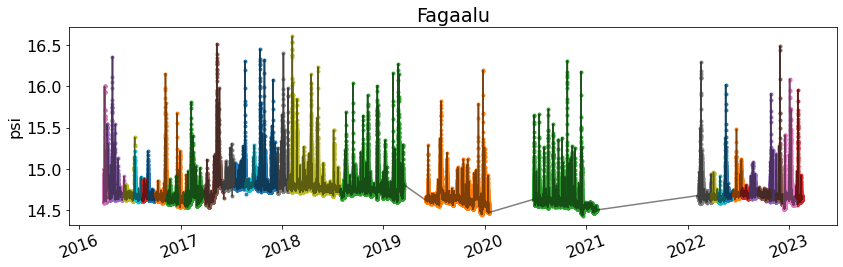

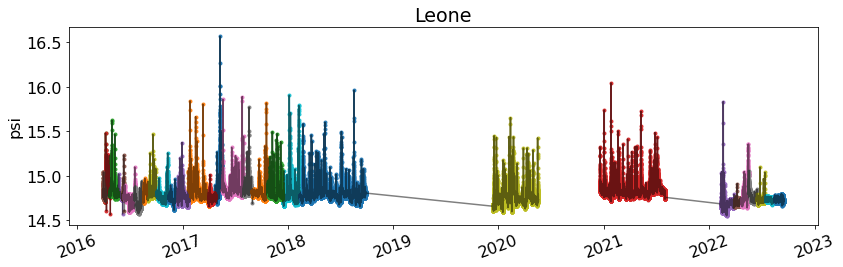

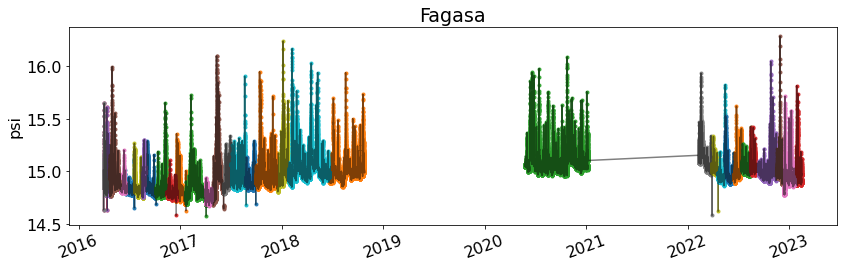

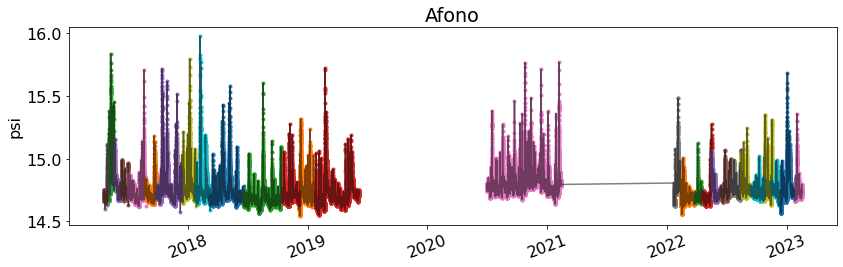

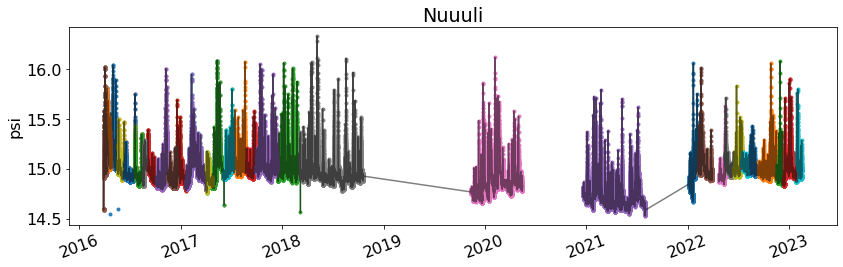

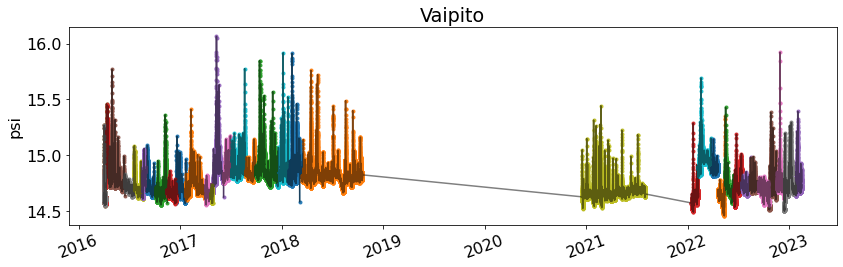

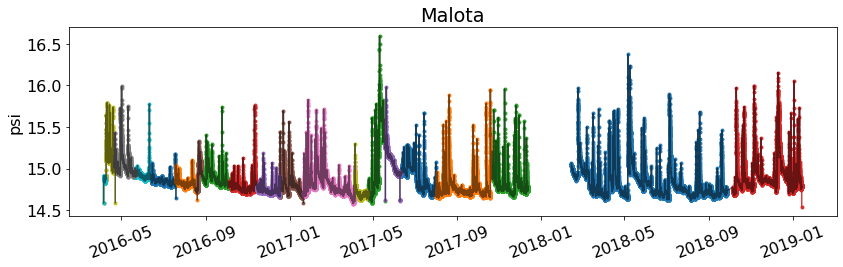

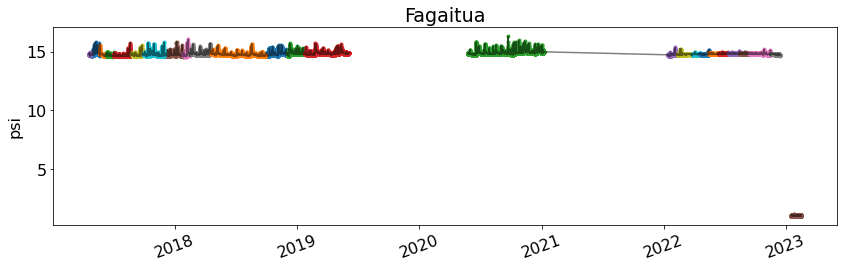

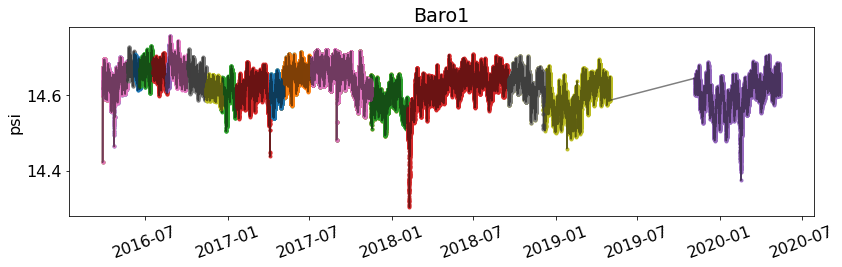

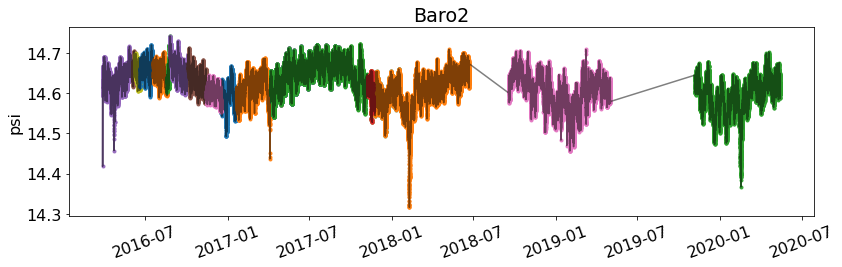

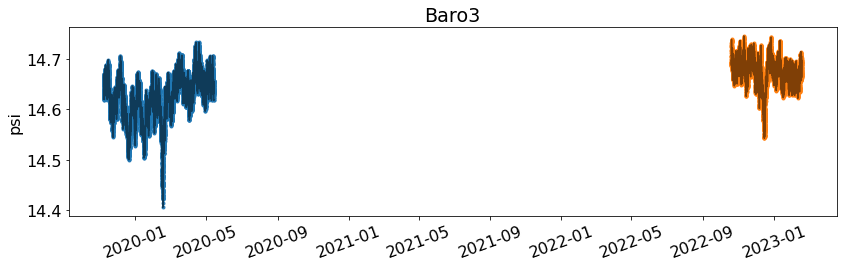

In [6]:
# Plot all data files

plt.close("all")  # close previous figures to clear memory
matplotlib.rcParams.update({'font.size': 16})

for q in stations:
    fig = plt.figure(figsize=(12, 4))
    ax1 = plt.axes()
    ax1.set_ylabel('psi', color='k')
    ax1.set_title(q)
        
    Temp_Dic ={}                              # prepare to plot each dataset by station
    r = re.compile(q)                         # find things that have this substring in them
    file_list = list(filter(r.match, Stream_file_list)) # list of files that correspond to station q only
    
    for i in file_list:
        plt.plot(All_data[i]['Date and Time'], All_data[i]['psi'], alpha = .9, label=i, marker='.')  # ploet each file in color
        
    plt.plot(All_compiled[q]['Date and Time'], All_compiled[q]['psi'], alpha = .5, color='k')     # plot the concatinated dataset in black
    
    plt.xticks(rotation=20)
    plt.tight_layout()